In [67]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.gridspec as gridspec

# Import files

In [68]:
# Read the file for 60 neurons
with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_60neurons\\summary.txt', 'r') as file:
    train_45_60 = file.read()

with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_60neurons_noise\\summary.txt', 'r') as file:
    train_45_60_noise = file.read()

with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_120_neruons\\summary.txt', 'r') as file:
    train_45_120 = file.read()

with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_120_neruons_noise\\summary.txt', 'r') as file:
    train_45_120_noise = file.read()

with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_240_neruons\\summary.txt', 'r') as file:
    train_45_240 = file.read()

with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_240_neruons_noise\\summary.txt', 'r') as file:
    train_45_240_noise = file.read()

with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_240_neruons_2_5\\summary.txt', 'r') as file:
    train_45_240_2_5 = file.read()

with open(r'C:\\Users\\Bruker\\Downloads\\orion_scripts_training_45\\results_2025-04-21_240_neruons_4_8\\summary.txt', 'r') as file:
    train_45_240_4_8 = file.read()

with open(r'C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_60\summary.txt', 'r') as file:
    val_45_60 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_60_noise\summary.txt", 'r') as file:
    val_45_60_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_120\summary.txt", 'r') as file:
    val_45_120 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_120_noise\summary.txt", 'r') as file:
    val_45_120_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_240\summary.txt", 'r') as file:
    val_45_240 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_240_noise\summary.txt", 'r') as file:
    val_45_240_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_240_2_5\summary.txt", 'r') as file:
    val_45_240_2_5 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_45\results_val_2025-04-21_45_240_4_8\summary.txt", 'r') as file:
    val_45_240_4_8 = file.read()


In [69]:
# Use regex to find the recall error list
match_train = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_60)
match_train_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_60_noise)
match_val = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_60)
match_val_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_60_noise)

match_train_120 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_120)
match_train_120_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_120_noise)
match_val_120 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_120)
match_val_120_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_120_noise)

match_train_240 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_240)
match_train_240_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_240_noise)
match_val_240 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_240)
match_val_240_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_240_noise)

match_train_240_2_5 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_240_2_5)
match_train_240_4_8 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_45_240_4_8)
match_val_240_2_5 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_240_2_5)
match_val_240_4_8 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_45_240_4_8)

In [70]:
if match_train:
    recall_errors_text = match_train.group(1)
    # Split the string into individual float numbers
    recall_errors = [float(num.strip()) for num in recall_errors_text.split(',') if num.strip()]
    print(recall_errors)

if match_train_noise:
    recall_errors_noise_text = match_train_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_noise = [float(num.strip()) for num in recall_errors_noise_text.split(',') if num.strip()]
    print(recall_errors_noise)

if match_val_noise:
    recall_errors_val_noise_text = match_val_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_val_noise = [float(num.strip()) for num in recall_errors_val_noise_text.split(',') if num.strip()]
    print(recall_errors_val_noise)

if match_val:
    recall_errors_val_text = match_val.group(1)
    # Split the string into individual float numbers
    recall_errors_val = [float(num.strip()) for num in recall_errors_val_text.split(',') if num.strip()]
    print(recall_errors_val)

[0.3636, 0.4364, 0.5273, 0.4727, 0.5273, 0.5636, 0.4182, 0.4, 0.4727, 0.4545, 0.6182, 0.3818, 0.5636, 0.5818, 0.6, 0.5091, 0.4182, 0.5455, 0.4182, 0.3818, 0.4364, 0.5273, 0.4182, 0.4182, 0.4545, 0.3818, 0.6182, 0.5273, 0.4364, 0.4182, 0.5636, 0.5636, 0.4545, 0.5273, 0.4909, 0.4364, 0.6909, 0.4545, 0.5091, 0.4909, 0.4364, 0.3455, 0.4364, 0.4727, 0.4364, 0.4909, 0.4909, 0.5091, 0.3818, 0.5273, 0.4909, 0.5091, 0.5818, 0.5818, 0.4545, 0.6182, 0.6, 0.3455, 0.4909, 0.5273, 0.4909, 0.3636, 0.6, 0.4727, 0.5091, 0.5273, 0.5636, 0.5455, 0.4545, 0.4909, 0.3818, 0.4727, 0.4727, 0.4364, 0.4364, 0.5455, 0.5455, 0.4545, 0.4727, 0.5818, 0.4545, 0.4727, 0.5091, 0.5818, 0.6, 0.5273, 0.5091, 0.4909, 0.5818, 0.3455, 0.4, 0.5091, 0.4364, 0.5273, 0.4909, 0.4727, 0.4, 0.3636, 0.4182, 0.5455, 0.4182, 0.3818, 0.5455, 0.3273, 0.6, 0.3455, 0.5273, 0.4909, 0.5273, 0.5818, 0.4727, 0.5091, 0.4909, 0.4909, 0.5091, 0.5273, 0.4, 0.5636, 0.5818, 0.3818, 0.5455, 0.5818, 0.5273, 0.5273, 0.6182, 0.4545, 0.5455, 0.4545, 0.

In [71]:
if match_train_120:
    recall_errors_120_text = match_train_120.group(1)
    # Split the string into individual float numbers
    recall_errors_120 = [float(num.strip()) for num in recall_errors_120_text.split(',') if num.strip()]
    print(recall_errors_120)

if match_train_120_noise:
    recall_errors_120_noise_text = match_train_120_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_120_noise = [float(num.strip()) for num in recall_errors_120_noise_text.split(',') if num.strip()]
    print(recall_errors_120_noise)

if match_val_120_noise:
    recall_errors_val_120_noise_text = match_val_120_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_val_120_noise = [float(num.strip()) for num in recall_errors_val_120_noise_text.split(',') if num.strip()]
    print(recall_errors_val_120_noise)

if match_val_120:
    recall_errors_val_120_text = match_val_120.group(1)
    # Split the string into individual float numbers
    recall_errors_val_120 = [float(num.strip()) for num in recall_errors_val_120_text.split(',') if num.strip()]
    print(recall_errors_val_120)

[0.4727, 0.4545, 0.4364, 0.4545, 0.4364, 0.5818, 0.4727, 0.5818, 0.5818, 0.4364, 0.5455, 0.5455, 0.5818, 0.4545, 0.5091, 0.5455, 0.5455, 0.5818, 0.3636, 0.5818, 0.4364, 0.4909, 0.4545, 0.4909, 0.5818, 0.4727, 0.4909, 0.5455, 0.5636, 0.4, 0.5818, 0.6182, 0.4909, 0.6182, 0.4909, 0.4545, 0.5818, 0.4909, 0.4182, 0.5091, 0.5273, 0.5636, 0.4182, 0.4364, 0.3455, 0.5091, 0.4182, 0.4182, 0.5636, 0.5273, 0.4909, 0.4182, 0.4727, 0.4182, 0.5273, 0.5455, 0.5636, 0.3818, 0.5455, 0.4182, 0.5091, 0.4909, 0.4909, 0.6182, 0.5273, 0.5455, 0.5273, 0.4909, 0.6182, 0.5818, 0.5636, 0.5091, 0.3636, 0.4909, 0.4727, 0.5455, 0.5091, 0.5455, 0.5455, 0.4909, 0.5091, 0.5455, 0.4727, 0.6909, 0.4, 0.4727, 0.4, 0.5455, 0.4182, 0.4, 0.6182, 0.4909, 0.5455, 0.5455, 0.4909, 0.3636, 0.4, 0.5273, 0.6727, 0.4364, 0.4364, 0.5455, 0.4727, 0.4909, 0.5091, 0.5273, 0.5273, 0.4, 0.3636, 0.4727, 0.6182, 0.3818, 0.4545, 0.6364, 0.5273, 0.4182, 0.5273, 0.5091, 0.4727, 0.4909, 0.5636, 0.3273, 0.4909, 0.5273, 0.4909, 0.4364, 0.4364, 0

In [72]:
if match_train_240:
    recall_errors_240_text = match_train_240.group(1)
    # Split the string into individual float numbers
    recall_errors_240 = [float(num.strip()) for num in recall_errors_240_text.split(',') if num.strip()]
    print(recall_errors_240)

if match_train_240_noise:
    recall_errors_240_noise_text = match_train_240_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_240_noise = [float(num.strip()) for num in recall_errors_240_noise_text.split(',') if num.strip()]
    print(recall_errors_240_noise)

if match_val_240_noise:
    recall_errors_val_240_noise_text = match_val_240_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_val_240_noise = [float(num.strip()) for num in recall_errors_val_240_noise_text.split(',') if num.strip()]
    print(recall_errors_val_240_noise)

if match_val_240:
    recall_errors_val_240_text = match_val_240.group(1)
    # Split the string into individual float numbers
    recall_errors_val_240 = [float(num.strip()) for num in recall_errors_val_240_text.split(',') if num.strip()]
    print(recall_errors_val_240)

[0.5455, 0.4545, 0.5818, 0.6, 0.5091, 0.4182, 0.5091, 0.4364, 0.4909, 0.4727, 0.4364, 0.4545, 0.5273, 0.4727, 0.4909, 0.5818, 0.5818, 0.4909, 0.4364, 0.6364, 0.4545, 0.3636, 0.4182, 0.4727, 0.5455, 0.4364, 0.5091, 0.5091, 0.4364, 0.4909, 0.5818, 0.5818, 0.5636, 0.5636, 0.4545, 0.5091, 0.5455, 0.4909, 0.4182, 0.5273, 0.5636, 0.5091, 0.4182, 0.3273, 0.4727, 0.4909, 0.4545, 0.3818, 0.6, 0.4727, 0.5273, 0.4, 0.4364, 0.4909, 0.5455, 0.5636, 0.5636, 0.4545, 0.4909, 0.4, 0.4909, 0.4909, 0.5455, 0.6545, 0.4727, 0.5636, 0.6545, 0.4, 0.5273, 0.4909, 0.2182, 0.4, 0.4727, 0.4909, 0.4364, 0.2727, 0.1091, 0.1273, 0.1455, 0.1818, 0.3273, 0.3455, 0.5091, 0.3818, 0.2545, 0.2909, 0.3273, 0.2, 0.1455, 0.2, 0.3091, 0.2364, 0.1636, 0.2545, 0.1455, 0.2, 0.0909, 0.1636, 0.2, 0.2182, 0.0727, 0.1273, 0.1455, 0.0182, 0.1273, 0.2727, 0.2, 0.2182, 0.1818, 0.2545, 0.2545, 0.2182, 0.1818, 0.2182, 0.2545, 0.3273, 0.1636, 0.2727, 0.2909, 0.2, 0.2727, 0.2, 0.1818, 0.1818, 0.2, 0.2545, 0.2545, 0.1818, 0.2545, 0.2182, 0

In [73]:
if match_train_240_2_5:
    recall_errors_240_2_5_text = match_train_240_2_5.group(1)
    # Split the string into individual float numbers
    recall_errors_240_2_5 = [float(num.strip()) for num in recall_errors_240_2_5_text.split(',') if num.strip()]
    print(recall_errors_240_2_5)

if match_train_240_4_8:
    recall_errors_240_4_8_text = match_train_240_4_8.group(1)
    # Split the string into individual float numbers
    recall_errors_240_4_8 = [float(num.strip()) for num in recall_errors_240_4_8_text.split(',') if num.strip()]
    print(recall_errors_240_4_8)

if match_val_240_2_5:
    recall_errors_val_240_2_5_text = match_val_240_2_5.group(1)
    # Split the string into individual float numbers
    recall_errors_val_240_2_5 = [float(num.strip()) for num in recall_errors_val_240_2_5_text.split(',') if num.strip()]
    print(recall_errors_val_240_2_5)

if match_val_240_4_8:
    recall_errors_val_240_4_8_text = match_val_240_4_8.group(1)
    # Split the string into individual float numbers
    recall_errors_val_240_4_8 = [float(num.strip()) for num in recall_errors_val_240_4_8_text.split(',') if num.strip()]
    print(recall_errors_val_240_4_8)

[0.5455, 0.4545, 0.5818, 0.6, 0.5091, 0.4182, 0.5091, 0.4364, 0.4909, 0.4727, 0.4364, 0.4545, 0.4909, 0.4727, 0.4909, 0.5818, 0.5818, 0.4909, 0.4909, 0.6182, 0.4545, 0.3636, 0.4182, 0.4364, 0.5636, 0.4545, 0.5091, 0.5091, 0.3818, 0.4364, 0.5273, 0.6, 0.5818, 0.5455, 0.4545, 0.5091, 0.5091, 0.4545, 0.4, 0.4909, 0.4909, 0.5091, 0.5273, 0.4, 0.5273, 0.5273, 0.6364, 0.4182, 0.5818, 0.3818, 0.4, 0.4727, 0.4727, 0.5091, 0.5636, 0.4909, 0.4, 0.3455, 0.4727, 0.4364, 0.4727, 0.4, 0.5455, 0.6182, 0.4727, 0.5091, 0.5455, 0.4364, 0.6182, 0.5818, 0.5455, 0.3636, 0.4545, 0.4182, 0.4909, 0.5273, 0.5273, 0.4727, 0.4182, 0.3636, 0.5636, 0.5091, 0.4, 0.4364, 0.4364, 0.4727, 0.4364, 0.5636, 0.5818, 0.3273, 0.5091, 0.4182, 0.5455, 0.4909, 0.4727, 0.3455, 0.3455, 0.2727, 0.2364, 0.2909, 0.4727, 0.4364, 0.3818, 0.3818, 0.2909, 0.3091, 0.3636, 0.3091, 0.2909, 0.3455, 0.3818, 0.3273, 0.3818, 0.3818, 0.3091, 0.3818, 0.3091, 0.2, 0.2, 0.3273, 0.2909, 0.2364, 0.2727, 0.3636, 0.3091, 0.2545, 0.2909, 0.3818, 0.345

[Text(0, 0.0, ''), Text(0, 0.5, ''), Text(0, 1.0, '')]

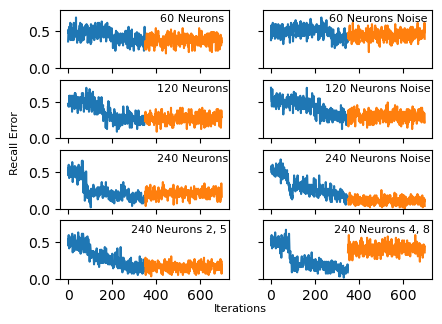

In [97]:
fig, axs = plt.subplots(4, 2, figsize=(4.8, 3.5))

# Assign each subplot
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]
ax5 = axs[2, 0]
ax6 = axs[2, 1]
ax7 = axs[3, 0]
ax8 = axs[3, 1]

fig.supxlabel('Iterations', fontsize=8)
fig.supylabel('Recall Error', fontsize=8)

# set y-axis max and min
y_max = 0.8
y_min = 0.0
for ax in axs.flat:
    ax.set_ylim(y_min, y_max)

# Plot the training recall errors
ax1.plot(recall_errors, label='Training Recall Error 45 Sampels', color='tab:blue')
ax1.plot(range(len(recall_errors), len(recall_errors) + len(recall_errors_val)), recall_errors_val, label='Validation Recall Error 5 Samples', color='tab:orange')
ax1.text(0.78, 0.85, '60 Neurons', transform=ax1.transAxes, ha='center', va='center', fontsize=8)
ax1.set_xticklabels([])


# Plot the training recall errors with noise
ax2.plot(recall_errors_noise, label='Training Recall Error 45 Samples (Noise)', color='tab:blue')
ax2.plot(range(len(recall_errors_noise), len(recall_errors_noise) + len(recall_errors_val_noise)), recall_errors_val_noise, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax2.text(0.68, 0.85, '60 Neurons Noise', transform=ax2.transAxes, ha='center', va='center', fontsize=8)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

# Plot the training recall errors for 120 neurons
ax3.plot(recall_errors_120, label='Training Recall Error 45 Samples', color='tab:blue')
ax3.plot(range(len(recall_errors_120), len(recall_errors_120) + len(recall_errors_val_120)), recall_errors_val_120, label='Validation Recall Error 5 Samples', color='tab:orange')
ax3.text(0.78, 0.85, '120 Neurons', transform=ax3.transAxes, ha='center', va='center', fontsize=8)
ax3.set_xticklabels([])


# Plot the training recall errors with noise for 120 neurons
ax4.plot(recall_errors_120_noise, label='Training Recall Error 45 Samples (Noise)', color='tab:blue')
ax4.plot(range(len(recall_errors_120_noise), len(recall_errors_120_noise) + len(recall_errors_val_120_noise)), recall_errors_val_120_noise, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax4.text(0.68, 0.85, '120 Neurons Noise', transform=ax4.transAxes, ha='center', va='center', fontsize=8)
ax4.set_xticklabels([])
ax4.set_yticklabels([])


# Plot the training recall errors for 240 neurons
ax5.plot(recall_errors_240, label='Training Recall Error 45 Samples', color='tab:blue')
ax5.plot(range(len(recall_errors_240), len(recall_errors_240) + len(recall_errors_val_240)), recall_errors_val_240, label='Validation Recall Error 5 Samples', color='tab:orange')
ax5.text(0.78, 0.85, '240 Neurons', transform=ax5.transAxes, ha='center', va='center', fontsize=8)
ax5.set_xticklabels([])


# Plot the training recall errors with noise for 240 neurons
ax6.plot(recall_errors_240_noise, label='Training Recall Error 45 Samples (Noise)', color='tab:blue')
ax6.plot(range(len(recall_errors_240_noise), len(recall_errors_240_noise) + len(recall_errors_val_240_noise)), recall_errors_val_240_noise, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax6.text(0.68, 0.85, '240 Neurons Noise', transform=ax6.transAxes, ha='center', va='center', fontsize=8)
ax6.set_xticklabels([])
ax6.set_yticklabels([])

# Plot the training recall errors for 240 neurons with 2.5 noise
ax7.plot(recall_errors_240_2_5, label='Training Recall Error 45 Samples', color='tab:blue')
ax7.plot(range(len(recall_errors_240_2_5), len(recall_errors_240_2_5) + len(recall_errors_val_240_2_5)), recall_errors_val_240_2_5, label='Validation Recall Error 5 Samples', color='tab:orange')
ax7.text(0.7, 0.85, '240 Neurons 2, 5', transform=ax7.transAxes, ha='center', va='center', fontsize=8)

# Plot the training recall errors with noise for 240 neurons with 4.8 noise
ax8.plot(recall_errors_240_4_8, label='Training Recall Error 45 Samples (Noise)', color='tab:blue')
ax8.plot(range(len(recall_errors_240_4_8), len(recall_errors_240_4_8) + len(recall_errors_val_240_4_8)), recall_errors_val_240_4_8, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax8.text(0.7, 0.85, '240 Neurons 4, 8', transform=ax8.transAxes, ha='center', va='center', fontsize=8)
ax8.set_yticklabels([])


In [75]:
# Calculate the mean and standard error of the 50 last samples of the train recall errors
mean_train_60 = round(np.mean(recall_errors[-50:]), 3)
sem_train_60 = round(stats.sem(recall_errors[-50:]), 3)
mean_train_60_noise = round(np.mean(recall_errors_noise[-50:]), 3)
sem_train_60_noise = round(stats.sem(recall_errors_noise[-50:]), 3)
mean_train_120 = round(np.mean(recall_errors_120[-50:]), 3)
sem_train_120 = round(stats.sem(recall_errors_120[-50:]), 3)
mean_train_120_noise = round(np.mean(recall_errors_120_noise[-50:]), 3)
sem_train_120_noise = round(stats.sem(recall_errors_120_noise[-50:]), 3)
mean_train_240 = round(np.mean(recall_errors_240[-50:]), 3)
sem_train_240 = round(stats.sem(recall_errors_240[-50:]), 3)
mean_train_240_noise = round(np.mean(recall_errors_240_noise[-50:]), 3)
sem_train_240_noise = round(stats.sem(recall_errors_240_noise[-50:]), 3)
mean_train_240_2_5 = round(np.mean(recall_errors_240_2_5[-50:]), 3)
sem_train_240_2_5 = round(stats.sem(recall_errors_240_2_5[-50:]), 3)
mean_train_240_4_8 = round(np.mean(recall_errors_240_4_8[-50:]), 3)
sem_train_240_4_8 = round(stats.sem(recall_errors_240_4_8[-50:]), 3)

# Calculate the mean and standard error of the val recall errors
mean_val_60 = round(np.mean(recall_errors_val), 3)
sem_val_60 = round(stats.sem(recall_errors_val), 3)
mean_val_60_noise = round(np.mean(recall_errors_val_noise), 3)
sem_val_60_noise = round(stats.sem(recall_errors_val_noise), 3)
mean_val_120 = round(np.mean(recall_errors_val_120), 3)
sem_val_120 = round(stats.sem(recall_errors_val_120), 3)
mean_val_120_noise = round(np.mean(recall_errors_val_120_noise), 3)
sem_val_120_noise = round(stats.sem(recall_errors_val_120_noise), 3)
mean_val_240 = round(np.mean(recall_errors_val_240), 3)
sem_val_240 = round(stats.sem(recall_errors_val_240), 3)
mean_val_240_noise = round(np.mean(recall_errors_val_240_noise), 3)
sem_val_240_noise = round(stats.sem(recall_errors_val_240_noise), 3)
mean_val_240_2_5 = round(np.mean(recall_errors_val_240_2_5), 3)
sem_val_240_2_5 = round(stats.sem(recall_errors_val_240_2_5), 3)
mean_val_240_4_8 = round(np.mean(recall_errors_val_240_4_8), 3)
sem_val_240_4_8 = round(stats.sem(recall_errors_val_240_4_8), 3)


In [76]:
# Make a table with the mean and standard deviation of the training and validation recall errors
data = {
    'Model': ['60', '60 Noise', '120', '120 Noise', '240', '240 Noise', '240 2,5', '240 4,8'],
    'Mean Train Recall Error': [mean_train_60, mean_train_60_noise, mean_train_120, mean_train_120_noise, mean_train_240, mean_train_240_noise, mean_train_240_2_5, mean_train_240_4_8],
    'Std Train Recall Error': [sem_train_60, sem_train_60_noise, sem_train_120, sem_train_120_noise, sem_train_240, sem_train_240_noise, sem_train_240_2_5, sem_train_240_4_8],
    'Mean Validation Recall Error': [mean_val_60, mean_val_60_noise, mean_val_120, mean_val_120_noise, mean_val_240, mean_val_240_noise, mean_val_240_2_5, mean_val_240_4_8],
    'Std Validation Recall Error': [sem_val_60, sem_val_60_noise, sem_val_120, sem_val_120_noise, sem_val_240, sem_val_240_noise, sem_val_240_2_5, sem_val_240_4_8]
}
df = pd.DataFrame(data)
df

,Model,Mean Train Recall Error,Std Train Recall Error,Mean Validation Recall Error,Std Validation Recall Error
0,60,0.385,0.009,0.380,0.003
1,60 Noise,0.409,0.009,0.451,0.003
2,120,0.247,0.008,0.271,0.003
3,120 Noise,0.289,0.009,0.303,0.003
4,240,0.148,0.007,0.209,0.003
5,240 Noise,0.171,0.007,0.107,0.002
6,"240 2,5",0.150,0.008,0.166,0.003
7,"240 4,8",0.121,0.006,0.412,0.004


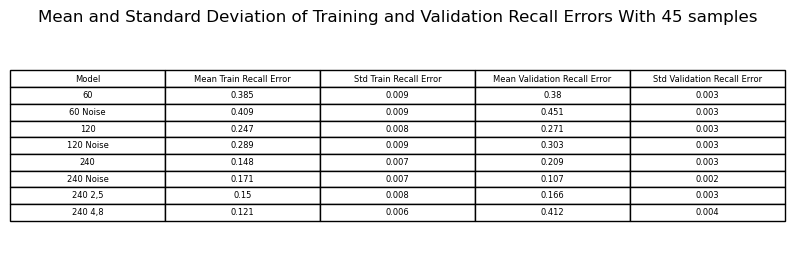

In [77]:
# Make the table into a plot
fig, ax = plt.subplots(figsize=(10, 3)) # set size frame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')
plt.title('Mean and Standard Deviation of Training and Validation Recall Errors With 45 samples')
plt.show()

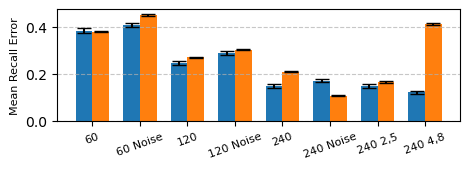

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bar width and positions
bar_width = 0.35
x = np.arange(len(df['Model']))

# Create the bar chart
fig, ax = plt.subplots(figsize=(4.8, 1.8))

plt.ylabel('Mean Recall Error', fontsize=8)
plt.xticks(rotation=20)

# Plot training bars
ax.bar(x - bar_width/2, df['Mean Train Recall Error'], width=bar_width,
       yerr=df['Std Train Recall Error'], capsize=5, label='Training')

# Plot validation bars
ax.bar(x + bar_width/2, df['Mean Validation Recall Error'], width=bar_width,
       yerr=df['Std Validation Recall Error'], capsize=5, label='Validation')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], fontsize=8)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

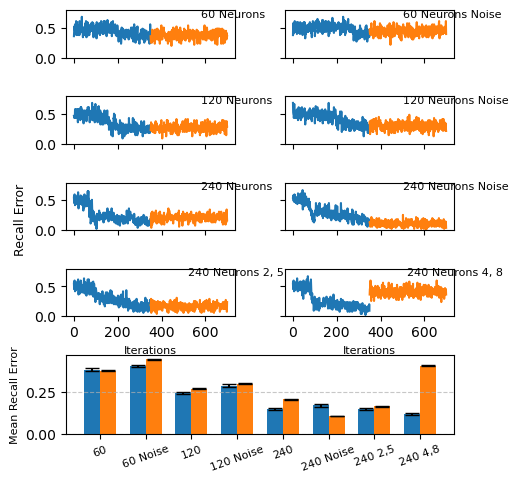

In [87]:
# --- Function to plot 4x2 recall error subplots ---
def plot_recall_subplots(axs):
    y_min, y_max = 0.0, 0.8
    for ax in axs:
        ax.set_ylim(y_min, y_max)

    ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axs

    ax1.plot(recall_errors, color='tab:blue')
    ax1.plot(range(len(recall_errors), len(recall_errors) + len(recall_errors_val)), recall_errors_val, color='tab:orange')
    ax1.text(0.8, 0.85, '60 Neurons', transform=ax1.transAxes, fontsize=8)
    ax1.set_xticklabels([])

    ax2.plot(recall_errors_noise, color='tab:blue')
    ax2.plot(range(len(recall_errors_noise), len(recall_errors_noise) + len(recall_errors_val_noise)), recall_errors_val_noise, color='tab:orange')
    ax2.text(0.7, 0.85, '60 Neurons Noise', transform=ax2.transAxes, fontsize=8)
    ax2.set_xticklabels([]); ax2.set_yticklabels([])

    ax3.plot(recall_errors_120, color='tab:blue')
    ax3.plot(range(len(recall_errors_120), len(recall_errors_120) + len(recall_errors_val_120)), recall_errors_val_120, color='tab:orange')
    ax3.text(0.8, 0.85, '120 Neurons', transform=ax3.transAxes, fontsize=8)
    ax3.set_xticklabels([])

    ax4.plot(recall_errors_120_noise, color='tab:blue')
    ax4.plot(range(len(recall_errors_120_noise), len(recall_errors_120_noise) + len(recall_errors_val_120_noise)), recall_errors_val_120_noise, color='tab:orange')
    ax4.text(0.7, 0.85, '120 Neurons Noise', transform=ax4.transAxes, fontsize=8)
    ax4.set_xticklabels([]); ax4.set_yticklabels([])

    ax5.plot(recall_errors_240, color='tab:blue')
    ax5.plot(range(len(recall_errors_240), len(recall_errors_240) + len(recall_errors_val_240)), recall_errors_val_240, color='tab:orange')
    ax5.text(0.8, 0.85, '240 Neurons', transform=ax5.transAxes, fontsize=8)
    ax5.set_xticklabels([])

    ax6.plot(recall_errors_240_noise, color='tab:blue')
    ax6.plot(range(len(recall_errors_240_noise), len(recall_errors_240_noise) + len(recall_errors_val_240_noise)), recall_errors_val_240_noise, color='tab:orange')
    ax6.text(0.7, 0.85, '240 Neurons Noise', transform=ax6.transAxes, fontsize=8)
    ax6.set_xticklabels([]); ax6.set_yticklabels([])

    ax7.plot(recall_errors_240_2_5, color='tab:blue')
    ax7.plot(range(len(recall_errors_240_2_5), len(recall_errors_240_2_5) + len(recall_errors_val_240_2_5)), recall_errors_val_240_2_5, color='tab:orange')
    ax7.text(0.72, 0.85, '240 Neurons 2, 5', transform=ax7.transAxes, fontsize=8)
    ax7.set_xlabel('Iterations', fontsize=8)

    ax8.plot(recall_errors_240_4_8, color='tab:blue')
    ax8.plot(range(len(recall_errors_240_4_8), len(recall_errors_240_4_8) + len(recall_errors_val_240_4_8)), recall_errors_val_240_4_8, color='tab:orange')
    ax8.text(0.72, 0.85, '240 Neurons 4, 8', transform=ax8.transAxes, fontsize=8)
    ax8.set_yticklabels([])
    ax8.set_xlabel('Iterations', fontsize=8)

# --- Function to plot the bar chart ---
def plot_bar_chart(ax):
    bar_width = 0.35
    x = np.arange(len(df['Model']))

    ax.bar(x - bar_width/2, df['Mean Train Recall Error'], width=bar_width,
           yerr=df['Std Train Recall Error'], capsize=5, label='Training')
    ax.bar(x + bar_width/2, df['Mean Validation Recall Error'], width=bar_width,
           yerr=df['Std Validation Recall Error'], capsize=5, label='Validation')

    ax.set_ylabel('Mean Recall Error', fontsize=8)
    ax.set_xticks(x)
    ax.set_xticklabels(df['Model'], fontsize=8, rotation=20)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# --- Combine everything into a master layout ---
fig = plt.figure(figsize=(5, 5.5))
gs = gridspec.GridSpec(5, 2, height_ratios=[0.6, 0.6, 0.6, 0.6, 1], hspace=0.72, wspace=0.3)

# Create 8 recall subplots
axs_recall = [fig.add_subplot(gs[i, j]) for i in range(4) for j in range(2)]
plot_recall_subplots(axs_recall)

# Create the bar chart subplot
ax_bar = fig.add_subplot(gs[4, :])
plot_bar_chart(ax_bar)

# Shared labels
fig.supylabel('Recall Error', fontsize=9)

plt.show()


# Result for models with 5 samples

In [100]:
with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_5\results_2025-04-21_5_60_neurons\summary.txt", 'r') as file:
    train_5_60 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_5\results_2025-04-21_5_60_neurons_noise\summary.txt", 'r') as file:
    train_5_60_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_5\results_2025-04-21_5_120_neruons\summary.txt", 'r') as file:
    train_5_120 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_5\results_2025-04-21_5_120_neruons_noise\summary.txt", 'r') as file:
    train_5_120_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_5\results_2025-04-21_5_240_neruons\summary.txt", 'r') as file:
    train_5_240 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_5\results_2025-04-21_5_240_neruons_noise\summary.txt", 'r') as file:
    train_5_240_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_5\results_val_2025-04-21_5_60\summary.txt", 'r') as file:
    val_5_60 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_5\results_val_2025-04-21_5_60_noise\summary.txt", 'r') as file:
    val_5_60_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_5\results_val_2025-04-21_5_120\summary.txt", 'r') as file:
    val_5_120 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_5\results_val_2025-04-21_5_120_noise\summary.txt", 'r') as file:
    val_5_120_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_5\results_val_2025-04-21_5_240\summary.txt", 'r') as file:
    val_5_240 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_5\results_val_2025-04-21_5_240_noise\summary.txt", 'r') as file:
    val_5_240_noise = file.read()

In [101]:
match_train_5_60 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_60)
match_train_5_60_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_60_noise)
match_val_5_60 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_60)
match_val_5_60_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_60_noise)

match_train_5_120 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_120)
match_train_5_120_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_120_noise)
match_val_5_120 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_120)
match_val_5_120_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_120_noise)

match_train_5_240 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_240)
match_train_5_240_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_240_noise)
match_val_5_240 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_240)
match_val_5_240_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_240_noise)

In [102]:
if match_train_5_60:
    recall_errors_5_60_text = match_train_5_60.group(1)
    # Split the string into individual float numbers
    recall_errors_5_60 = [float(num.strip()) for num in recall_errors_5_60_text.split(',') if num.strip()]
    print(recall_errors_5_60)

if match_train_5_60_noise:
    recall_errors_5_60_noise_text = match_train_5_60_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_5_60_noise = [float(num.strip()) for num in recall_errors_5_60_noise_text.split(',') if num.strip()]
    print(recall_errors_5_60_noise)

if match_val_5_60_noise:
    recall_errors_val_5_60_noise_text = match_val_5_60_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_val_5_60_noise = [float(num.strip()) for num in recall_errors_val_5_60_noise_text.split(',') if num.strip()]
    print(recall_errors_val_5_60_noise)

if match_val_5_60:
    recall_errors_val_5_60_text = match_val_5_60.group(1)
    # Split the string into individual float numbers
    recall_errors_val_5_60 = [float(num.strip()) for num in recall_errors_val_5_60_text.split(',') if num.strip()]
    print(recall_errors_val_5_60)

[0.4909, 0.5273, 0.6182, 0.3636, 0.4364, 0.6, 0.5818, 0.4909, 0.3818, 0.5091, 0.5273, 0.5091, 0.5091, 0.4182, 0.4364, 0.4545, 0.3818, 0.6, 0.5091, 0.6364, 0.5091, 0.5818, 0.4545, 0.4909, 0.3818, 0.4182, 0.4727, 0.5091, 0.4909, 0.4545, 0.4545, 0.5273, 0.4727, 0.4545, 0.4364, 0.5091, 0.5091, 0.4364, 0.5091, 0.6545, 0.4727, 0.5273, 0.6182, 0.4909, 0.6182, 0.5636, 0.4909, 0.6, 0.4909, 0.4545, 0.5091, 0.5818, 0.4182, 0.5273, 0.4364, 0.3273, 0.5273, 0.4, 0.4, 0.4727, 0.5091, 0.4, 0.5455, 0.5091, 0.4727, 0.4909, 0.4909, 0.5455, 0.5091, 0.5273, 0.4364, 0.5818, 0.4182, 0.4727, 0.4364, 0.5455, 0.4364, 0.4545, 0.4364, 0.4909, 0.4727, 0.4545, 0.5091, 0.4364, 0.4727, 0.5091, 0.3455, 0.4727, 0.4364, 0.6, 0.4182, 0.5455, 0.5818, 0.4909, 0.6182, 0.5273, 0.5273, 0.4545, 0.5455, 0.5273, 0.5091, 0.5091, 0.5091, 0.5818, 0.4, 0.4909, 0.5091, 0.4909, 0.4364, 0.4727, 0.5818, 0.4545, 0.4364, 0.5091, 0.4364, 0.4909, 0.4545, 0.4909, 0.4, 0.4364, 0.5273, 0.5273, 0.5455, 0.4545, 0.3818, 0.4727, 0.5455, 0.5455, 0.

In [103]:
if match_train_5_120:
    recall_errors_5_120_text = match_train_5_120.group(1)
    # Split the string into individual float numbers
    recall_errors_5_120 = [float(num.strip()) for num in recall_errors_5_120_text.split(',') if num.strip()]
    print(recall_errors_5_120)

if match_train_5_120_noise:
    recall_errors_5_120_noise_text = match_train_5_120_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_5_120_noise = [float(num.strip()) for num in recall_errors_5_120_noise_text.split(',') if num.strip()]
    print(recall_errors_5_120_noise)

if match_val_5_120_noise:
    recall_errors_val_5_120_noise_text = match_val_5_120_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_val_5_120_noise = [float(num.strip()) for num in recall_errors_val_5_120_noise_text.split(',') if num.strip()]
    print(recall_errors_val_5_120_noise)

if match_val_5_120:
    recall_errors_val_5_120_text = match_val_5_120.group(1)
    # Split the string into individual float numbers
    recall_errors_val_5_120 = [float(num.strip()) for num in recall_errors_val_5_120_text.split(',') if num.strip()]
    print(recall_errors_val_5_120)

[0.4727, 0.6364, 0.4, 0.6182, 0.5455, 0.4, 0.6, 0.4182, 0.6182, 0.4909, 0.4364, 0.4545, 0.4545, 0.4364, 0.5273, 0.4727, 0.4364, 0.5273, 0.5273, 0.6364, 0.5455, 0.5818, 0.4909, 0.4909, 0.3818, 0.4364, 0.5273, 0.4545, 0.4909, 0.4545, 0.4364, 0.4545, 0.4182, 0.4727, 0.4545, 0.4545, 0.5091, 0.4364, 0.5273, 0.6182, 0.4727, 0.5636, 0.6182, 0.5091, 0.5818, 0.5455, 0.4909, 0.5455, 0.5091, 0.4545, 0.5455, 0.5636, 0.4545, 0.5273, 0.4545, 0.3273, 0.4909, 0.4, 0.4364, 0.4545, 0.5636, 0.4364, 0.5091, 0.5636, 0.4182, 0.4909, 0.4727, 0.5818, 0.4909, 0.5091, 0.4182, 0.6, 0.4545, 0.4909, 0.5091, 0.5091, 0.5455, 0.4182, 0.5273, 0.4909, 0.4909, 0.4364, 0.5455, 0.4727, 0.5091, 0.4909, 0.4, 0.4727, 0.4909, 0.5636, 0.4545, 0.5273, 0.6182, 0.4727, 0.5636, 0.5091, 0.5273, 0.4727, 0.6182, 0.5273, 0.4364, 0.4727, 0.4545, 0.5273, 0.3273, 0.4727, 0.5455, 0.5455, 0.3455, 0.4364, 0.4727, 0.4727, 0.4727, 0.4182, 0.4364, 0.5455, 0.4182, 0.4364, 0.4364, 0.3818, 0.4727, 0.4909, 0.4727, 0.4182, 0.4182, 0.5273, 0.4545, 0

In [104]:
if match_train_5_240:
    recall_errors_5_240_text = match_train_5_240.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240 = [float(num.strip()) for num in recall_errors_5_240_text.split(',') if num.strip()]
    print(recall_errors_5_240)

if match_train_5_240_noise:
    recall_errors_5_240_noise_text = match_train_5_240_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_noise = [float(num.strip()) for num in recall_errors_5_240_noise_text.split(',') if num.strip()]
    print(recall_errors_5_240_noise)

if match_val_5_240_noise:   
    recall_errors_val_5_240_noise_text = match_val_5_240_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_val_5_240_noise = [float(num.strip()) for num in recall_errors_val_5_240_noise_text.split(',') if num.strip()]
    print(recall_errors_val_5_240_noise)

if match_val_5_240:
    recall_errors_val_5_240_text = match_val_5_240.group(1)
    # Split the string into individual float numbers
    recall_errors_val_5_240 = [float(num.strip()) for num in recall_errors_val_5_240_text.split(',') if num.strip()]
    print(recall_errors_val_5_240)

[0.6182, 0.4727, 0.4182, 0.5636, 0.3455, 0.5455, 0.4909, 0.6545, 0.3818, 0.4545, 0.5273, 0.5455, 0.4545, 0.4727, 0.4545, 0.4727, 0.5818, 0.4, 0.4909, 0.3818, 0.5273, 0.5636, 0.4727, 0.4727, 0.4727, 0.5636, 0.4364, 0.6, 0.5273, 0.4909, 0.4, 0.4909, 0.5091, 0.4909, 0.4364, 0.4545, 0.5091, 0.4182, 0.5455, 0.5636, 0.4364, 0.5273, 0.3818, 0.4727, 0.5091, 0.5818, 0.4545, 0.7091, 0.5818, 0.5273, 0.5273, 0.6182, 0.5818, 0.4909, 0.4545, 0.3091, 0.4364, 0.4909, 0.4909, 0.4545, 0.5091, 0.6182, 0.4, 0.4727, 0.4545, 0.3455, 0.3091, 0.3455, 0.1455, 0.3091, 0.2545, 0.4364, 0.5091, 0.5273, 0.3091, 0.3091, 0.2909, 0.2364, 0.2545, 0.3636, 0.2182, 0.1636, 0.1455, 0.1818, 0.1455, 0.2364, 0.2, 0.1091, 0.2545, 0.1636, 0.2182, 0.1091, 0.2909, 0.2182, 0.1636, 0.2909, 0.1273, 0.1818, 0.2, 0.2909, 0.1455, 0.1455, 0.1636, 0.1273, 0.2727, 0.2545, 0.1636, 0.1818, 0.2, 0.2727, 0.0909, 0.1636, 0.2, 0.1091, 0.1091, 0.0909, 0.1818, 0.0909, 0.1818, 0.1091, 0.2364, 0.1818, 0.2182, 0.2727, 0.1455, 0.2, 0.2364, 0.2, 0.254

[Text(0, 0.0, ''), Text(0, 0.5, ''), Text(0, 1.0, '')]

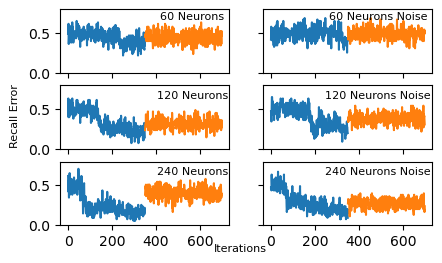

In [105]:
fig, axs = plt.subplots(3, 2, figsize=(4.8, 2.8))
# Assign each subplot
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]
ax5 = axs[2, 0]
ax6 = axs[2, 1]

fig.supxlabel('Iterations', fontsize=8)
fig.supylabel('Recall Error', fontsize=8)

# set y-axis max and min
y_max = 0.8
y_min = 0.0
for ax in axs.flat:
    ax.set_ylim(y_min, y_max)

# Plot the training recall errors
ax1.plot(recall_errors_5_60, label='Training Recall Error 5 Samples', color='tab:blue')
ax1.plot(range(len(recall_errors_5_60), len(recall_errors_5_60) + len(recall_errors_val_5_60)), recall_errors_val_5_60, label='Validation Recall Error 5 Samples', color='tab:orange')
ax1.text(0.78, 0.89, '60 Neurons', transform=ax1.transAxes, ha='center', va='center', fontsize=8)
ax1.set_xticklabels([])

# Plot the training recall errors with noise
ax2.plot(recall_errors_5_60_noise, label='Training Recall Error 5 Samples (Noise)', color='tab:blue')
ax2.plot(range(len(recall_errors_5_60_noise), len(recall_errors_5_60_noise) + len(recall_errors_val_5_60_noise)), recall_errors_val_5_60_noise, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax2.text(0.68, 0.89, '60 Neurons Noise', transform=ax2.transAxes, ha='center', va='center', fontsize=8)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

# Plot the training recall errors for 120 neurons
ax3.plot(recall_errors_5_120, label='Training Recall Error 5 Samples', color='tab:blue')
ax3.plot(range(len(recall_errors_5_120), len(recall_errors_5_120) + len(recall_errors_val_5_120)), recall_errors_val_5_120, label='Validation Recall Error 5 Samples', color='tab:orange')
ax3.text(0.78, 0.85, '120 Neurons', transform=ax3.transAxes, ha='center', va='center', fontsize=8)
ax3.set_xticklabels([])

# Plot the training recall errors with noise for 120 neurons
ax4.plot(recall_errors_5_120_noise, label='Training Recall Error 5 Samples (Noise)', color='tab:blue')
ax4.plot(range(len(recall_errors_5_120_noise), len(recall_errors_5_120_noise) + len(recall_errors_val_5_120_noise)), recall_errors_val_5_120_noise, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax4.text(0.68, 0.85, '120 Neurons Noise', transform=ax4.transAxes, ha='center', va='center', fontsize=8)
ax4.set_xticklabels([])
ax4.set_yticklabels([])

# Plot the training recall errors for 240 neurons
ax5.plot(recall_errors_5_240, label='Training Recall Error 5 Samples', color='tab:blue')
ax5.plot(range(len(recall_errors_5_240), len(recall_errors_5_240) + len(recall_errors_val_5_240)), recall_errors_val_5_240, label='Validation Recall Error 5 Samples', color='tab:orange')
ax5.text(0.78, 0.85, '240 Neurons', transform=ax5.transAxes, ha='center', va='center',fontsize=8)

# Plot the training recall errors with noise for 240 neurons
ax6.plot(recall_errors_5_240_noise, label='Training Recall Error 5 Samples (Noise)', color='tab:blue')
ax6.plot(range(len(recall_errors_5_240_noise), len(recall_errors_5_240_noise) + len(recall_errors_val_5_240_noise)), recall_errors_val_5_240_noise, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax6.text(0.68, 0.85, '240 Neurons Noise', transform=ax6.transAxes, ha='center', va='center', fontsize=8)
ax6.set_yticklabels([])

In [106]:
mean_train_5_60 = round(np.mean(recall_errors_5_60[-50:]), 3)
sem_train_5_60 = round(stats.sem(recall_errors_5_60[-50:]), 3)
mean_train_5_60_noise = round(np.mean(recall_errors_5_60_noise[-50:]), 3)
sem_train_5_60_noise = round(stats.sem(recall_errors_5_60_noise[-50:]), 3)
mean_train_5_120 = round(np.mean(recall_errors_5_120[-50:]), 3)
sem_train_5_120 = round(stats.sem(recall_errors_5_120[-50:]), 3)
mean_train_5_120_noise = round(np.mean(recall_errors_5_120_noise[-50:]), 3)
sem_train_5_120_noise = round(stats.sem(recall_errors_5_120_noise[-50:]), 3)
mean_train_5_240 = round(np.mean(recall_errors_5_240[-50:]), 3)
sem_train_5_240 = round(stats.sem(recall_errors_5_240[-50:]), 3)
mean_train_5_240_noise = round(np.mean(recall_errors_5_240_noise[-50:]), 3)
sem_train_5_240_noise = round(stats.sem(recall_errors_5_240_noise[-50:]), 3)

mean_val_5_60 = round(np.mean(recall_errors_val_5_60), 3)
sem_val_5_60 = round(stats.sem(recall_errors_val_5_60), 3)
mean_val_5_60_noise = round(np.mean(recall_errors_val_5_60_noise), 3)
sem_val_5_60_noise = round(stats.sem(recall_errors_val_5_60_noise), 3)
mean_val_5_120 = round(np.mean(recall_errors_val_5_120), 3)
sem_val_5_120 = round(stats.sem(recall_errors_val_5_120), 3)
mean_val_5_120_noise = round(np.mean(recall_errors_val_5_120_noise), 3)
sem_val_5_120_noise = round(stats.sem(recall_errors_val_5_120_noise), 3)
mean_val_5_240 = round(np.mean(recall_errors_val_5_240), 3)
sem_val_5_240 = round(stats.sem(recall_errors_val_5_240), 3)
mean_val_5_240_noise = round(np.mean(recall_errors_val_5_240_noise), 3)
sem_val_5_240_noise = round(stats.sem(recall_errors_val_5_240_noise), 3)

In [107]:
# Make a dataframe with the mean and std of the training and validation recall errors
data = {
    'Model': ['60', '60 Noise', '120', '120 Noise', '240', '240 Noise'],
    'Mean Train Recall Error': [mean_train_5_60, mean_train_5_60_noise, mean_train_5_120, mean_train_5_120_noise, mean_train_5_240, mean_train_5_240_noise],
    'Std Train Recall Error': [sem_train_5_60, sem_train_5_60_noise, sem_train_5_120, sem_train_5_120_noise, sem_train_5_240, sem_train_5_240_noise],
    'Mean Validation Recall Error': [mean_val_5_60, mean_val_5_60_noise, mean_val_5_120, mean_val_5_120_noise, mean_val_5_240, mean_val_5_240_noise],
    'Std Validation Recall Error': [sem_val_5_60, sem_val_5_60_noise, sem_val_5_120, sem_val_5_120_noise, sem_val_5_240, sem_val_5_240_noise]
}
df_5 = pd.DataFrame(data)
df_5

,Model,Mean Train Recall Error,Std Train Recall Error,Mean Validation Recall Error,Std Validation Recall Error
0,60,0.382,0.011,0.452,0.004
1,60 Noise,0.439,0.013,0.492,0.003
2,120,0.211,0.009,0.317,0.003
3,120 Noise,0.271,0.009,0.382,0.003
4,240,0.154,0.007,0.406,0.004
5,240 Noise,0.166,0.008,0.271,0.003


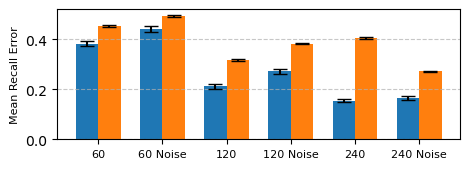

In [134]:
# Make a bar plot with the mean and std of the training and validation recall errors
# Bar width and positions
bar_width = 0.35
x = np.arange(len(df_5['Model']))

# Create the bar chart
fig, ax = plt.subplots(figsize=(4.8, 1.8))

plt.ylabel('Mean Recall Error', fontsize=8)

# Plot training bars
ax.bar(x - bar_width/2, df_5['Mean Train Recall Error'], width=bar_width,
       yerr=df_5['Std Train Recall Error'], capsize=5, label='Training')

# Plot validation bars
ax.bar(x + bar_width/2, df_5['Mean Validation Recall Error'], width=bar_width,
       yerr=df_5['Std Validation Recall Error'], capsize=5, label='Validation')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(df_5['Model'], fontsize=8)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Three classes

In [109]:
with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_three\results_2025-04-21_120_neruons\summary.txt", 'r') as file:
    train_Three_120 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_three\results_2025-04-21_240_neruons\summary.txt", 'r') as file:
    train_Three_240 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_training_three\results_2025-04-21_480_neruons\summary.txt", 'r') as file:
    train_Three_480 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_three\results_val_2025-04-21_45_120\summary.txt", 'r') as file:
    val_Three_120 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_three\results_val_2025-04-21_45_240\summary.txt", 'r') as file:
    val_Three_240 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_val_three\results_val_2025-04-21_45_480\summary.txt", 'r') as file:
    val_Three_480 = file.read()


In [110]:
match_three_train_120 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_Three_120)
match_three_train_240 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_Three_240)
match_three_train_480 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_Three_480)

match_three_val_120 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_Three_120)
match_three_val_240 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_Three_240)
match_three_val_480 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_Three_480)

In [111]:
if match_three_train_120:
    recall_errors_text = match_three_train_120.group(1)
    # Split the string into individual float numbers
    recall_errors_three_120 = [float(num.strip()) for num in recall_errors_text.split(',') if num.strip()]
    print(recall_errors_three_120)

if match_three_train_240:
    recall_errors_text = match_three_train_240.group(1)
    # Split the string into individual float numbers
    recall_errors_three_240 = [float(num.strip()) for num in recall_errors_text.split(',') if num.strip()]
    print(recall_errors_three_240)

if match_three_train_480:
    recall_errors_text = match_three_train_480.group(1)
    # Split the string into individual float numbers
    recall_errors_three_480 = [float(num.strip()) for num in recall_errors_text.split(',') if num.strip()]
    print(recall_errors_three_480)

if match_three_val_120:
    recall_errors_text = match_three_val_120.group(1)
    # Split the string into individual float numbers
    recall_errors_three_120_val = [float(num.strip()) for num in recall_errors_text.split(',') if num.strip()]
    print(recall_errors_three_120_val)

if match_three_val_240:
    recall_errors_text = match_three_val_240.group(1)
    # Split the string into individual float numbers
    recall_errors_three_240_val = [float(num.strip()) for num in recall_errors_text.split(',') if num.strip()]
    print(recall_errors_three_240_val)

if match_three_val_480:
    recall_errors_text = match_three_val_480.group(1)
    # Split the string into individual float numbers
    recall_errors_three_480_val = [float(num.strip()) for num in recall_errors_text.split(',') if num.strip()]
    print(recall_errors_three_480_val)

[0.5818, 0.6182, 0.5636, 0.6727, 0.7273, 0.7273, 0.6909, 0.5636, 0.6727, 0.7273, 0.6545, 0.6364, 0.7636, 0.7273, 0.6727, 0.6364, 0.6364, 0.6182, 0.6727, 0.5455, 0.6, 0.6727, 0.6545, 0.5636, 0.8182, 0.6364, 0.5818, 0.6727, 0.6182, 0.6545, 0.6727, 0.5818, 0.6727, 0.6, 0.7091, 0.6909, 0.7273, 0.7273, 0.7091, 0.6909, 0.8182, 0.6909, 0.5818, 0.7455, 0.6, 0.6182, 0.6545, 0.6727, 0.6182, 0.6, 0.6182, 0.6364, 0.7455, 0.7273, 0.5455, 0.6909, 0.6364, 0.6545, 0.7273, 0.6727, 0.7455, 0.6727, 0.6909, 0.6, 0.5818, 0.6727, 0.8, 0.6364, 0.6545, 0.6, 0.7455, 0.6364, 0.6545, 0.7455, 0.6545, 0.5091, 0.6909, 0.7091, 0.6545, 0.6545, 0.7091, 0.8, 0.7091, 0.6727, 0.5273, 0.6545, 0.6545, 0.6364, 0.5636, 0.7636, 0.6, 0.5455, 0.6182, 0.6182, 0.6182, 0.6909, 0.6727, 0.6909, 0.6364, 0.6182, 0.6182, 0.6182, 0.8182, 0.5636, 0.5818, 0.4909, 0.5273, 0.6182, 0.4545, 0.6182, 0.6182, 0.6545, 0.6182, 0.6182, 0.5818, 0.6909, 0.5636, 0.6909, 0.6727, 0.5818, 0.6182, 0.6, 0.6182, 0.6, 0.6364, 0.6364, 0.4364, 0.4909, 0.6364, 

Text(0.88, 0.88, '480 Neurons')

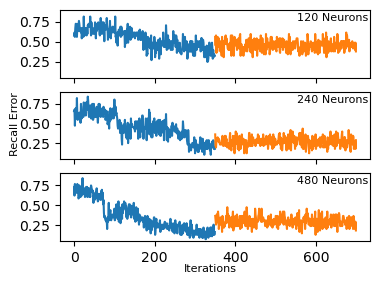

In [112]:
fig, axs = plt.subplots(3, 1, figsize=(4, 3))

# Assign each subplot
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

fig.supxlabel('Iterations', fontsize=8, y=0.00)
fig.supylabel('Recall Error', fontsize=8, y=0.5, x=0.00)
# set y-axis max and min
y_max = 0.9
y_min = 0.05
for ax in axs.flat:
    ax.set_ylim(y_min, y_max)

# Plot the training recall errors for 120 neurons
ax1.plot(recall_errors_three_120, label='Training Recall Error 45 Samples', color='tab:blue')
ax1.plot(range(len(recall_errors_three_120), len(recall_errors_three_120) + len(recall_errors_three_120_val)), recall_errors_three_120_val, label='Validation Recall Error 5 Samples', color='tab:orange')
ax1.text(0.88, 0.88, '120 Neurons', transform=ax1.transAxes, ha='center', va='center', fontsize=8)
ax1.set_xticklabels([])

# Plot the training recall errors for 240 neurons
ax2.plot(recall_errors_three_240, label='Training Recall Error 45 Samples', color='tab:blue')
ax2.plot(range(len(recall_errors_three_240), len(recall_errors_three_240) + len(recall_errors_three_240_val)), recall_errors_three_240_val, label='Validation Recall Error 5 Samples', color='tab:orange')
ax2.text(0.88, 0.88, '240 Neurons', transform=ax2.transAxes, ha='center', va='center', fontsize=8)
ax2.set_xticklabels([])

# Plot the training recall errors for 480 neurons
ax3.plot(recall_errors_three_480, label='Training Recall Error 45 Samples', color='tab:blue')
ax3.plot(range(len(recall_errors_three_480), len(recall_errors_three_480) + len(recall_errors_three_480_val)), recall_errors_three_480_val, label='Validation Recall Error 5 Samples', color='tab:orange')
ax3.text(0.88, 0.88, '480 Neurons', transform=ax3.transAxes, ha='center', va='center', fontsize=8)


In [113]:
# Calculate the mean and sem of the 50 last samples of the train recall errors
mean_train_three_120 = round(np.mean(recall_errors_three_120[-50:]), 3)
sem_train_three_120 = round(stats.sem(recall_errors_three_120[-50:]), 3)
mean_train_three_240 = round(np.mean(recall_errors_three_240[-50:]), 3)
sem_train_three_240 = round(stats.sem(recall_errors_three_240[-50:]), 3)
mean_train_three_480 = round(np.mean(recall_errors_three_480[-50:]), 3)
sem_train_three_480 = round(stats.sem(recall_errors_three_480[-50:]), 3)

# Calculate the mean and sem of the val recall errors
mean_val_three_120 = round(np.mean(recall_errors_three_120_val), 3)
sem_val_three_120 = round(stats.sem(recall_errors_three_120_val), 3)
mean_val_three_240 = round(np.mean(recall_errors_three_240_val), 3)
sem_val_three_240 = round(stats.sem(recall_errors_three_240_val), 3)
mean_val_three_480 = round(np.mean(recall_errors_three_480_val), 3)
sem_val_three_480 = round(stats.sem(recall_errors_three_480_val), 3)


In [114]:
# Make a dataframe with the mean and std of the training and validation recall errors for thrre classes
data = {
    'Model': ['120', '240', '480'],
    'Mean Train Recall Error': [mean_train_three_120, mean_train_three_240, mean_train_three_480],
    'Std Train Recall Error': [sem_train_three_120, sem_train_three_240, sem_train_three_480],
    'Mean Validation Recall Error': [mean_val_three_120, mean_val_three_240, mean_val_three_480],
    'Std Validation Recall Error': [sem_val_three_120, sem_val_three_240, sem_val_three_480]
}
df_three = pd.DataFrame(data)
df_three

,Model,Mean Train Recall Error,Std Train Recall Error,Mean Validation Recall Error,Std Validation Recall Error
0,120,0.413,0.012,0.460,0.004
1,240,0.220,0.008,0.272,0.003
2,480,0.157,0.006,0.297,0.003


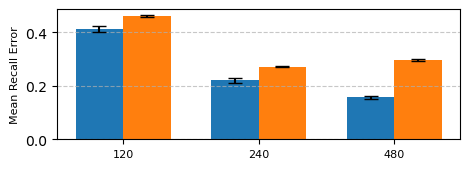

In [135]:
# Make a bar plot with the mean and std of the training and validation recall errors for three classes
# Bar width and positions
bar_width = 0.35
x = np.arange(len(df_three['Model']))

# Create the bar chart
fig, ax = plt.subplots(figsize=(4.8, 1.8))
# Plot training bars
ax.bar(x - bar_width/2, df_three['Mean Train Recall Error'], width=bar_width,
       yerr=df_three['Std Train Recall Error'], capsize=5, label='Training')
# Plot validation bars
ax.bar(x + bar_width/2, df_three['Mean Validation Recall Error'], width=bar_width,
       yerr=df_three['Std Validation Recall Error'], capsize=5, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(df_three['Model'], fontsize=8)
ax.set_ylabel('Mean Recall Error', fontsize=8)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 4 and 8 validation networks

In [116]:
with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_2025-05-01_240_neruons_4_8_list_1\summary.txt", 'r') as file:
    train_4_8_list1 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_2025-05-01_240_neruons_4_8_list_2\summary.txt", 'r') as file:
    train_4_8_list2 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_2025-05-01_240_neruons_4_8_list_3\summary.txt", 'r') as file:
    train_4_8_list3 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_2025-05-01_240_neruons_4_8_list_4\summary.txt", 'r') as file:
    train_4_8_list4 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_val_2025-05-01_45_240_4_8_list_1\summary.txt", 'r') as file:
    val_4_8_list1 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_val_2025-05-01_45_240_4_8_list_2\summary.txt", 'r') as file:
    val_4_8_list2 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_val_2025-05-01_45_240_4_8_list_3\summary.txt", 'r') as file:
    val_4_8_list3 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_4_8_val\results_val_2025-05-01_45_240_4_8_list_4\summary.txt", 'r') as file:
    val_4_8_list4 = file.read()

In [117]:
match_train_4_8_list1 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_4_8_list1)
match_train_4_8_list2 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_4_8_list2)
match_train_4_8_list3 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_4_8_list3)
match_train_4_8_list4 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_4_8_list4)

match_val_4_8_list1 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_4_8_list1)
match_val_4_8_list2 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_4_8_list2)
match_val_4_8_list3 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_4_8_list3)
match_val_4_8_list4 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_4_8_list4)

In [118]:
if match_train_4_8_list1:
    recall_errors_4_8_list1_text = match_train_4_8_list1.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list1 = [float(num.strip()) for num in recall_errors_4_8_list1_text.split(',') if num.strip()]
    print(recall_errors_4_8_list1)

if match_train_4_8_list2:
    recall_errors_4_8_list2_text = match_train_4_8_list2.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list2 = [float(num.strip()) for num in recall_errors_4_8_list2_text.split(',') if num.strip()]
    print(recall_errors_4_8_list2)

if match_train_4_8_list3:
    recall_errors_4_8_list3_text = match_train_4_8_list3.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list3 = [float(num.strip()) for num in recall_errors_4_8_list3_text.split(',') if num.strip()]
    print(recall_errors_4_8_list3)

if match_train_4_8_list4:
    recall_errors_4_8_list4_text = match_train_4_8_list4.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list4 = [float(num.strip()) for num in recall_errors_4_8_list4_text.split(',') if num.strip()]
    print(recall_errors_4_8_list4)

if match_val_4_8_list1:
    recall_errors_4_8_list1_text = match_val_4_8_list1.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list1_val = [float(num.strip()) for num in recall_errors_4_8_list1_text.split(',') if num.strip()]
    print(recall_errors_4_8_list1_val)

if match_val_4_8_list2:
    recall_errors_4_8_list2_text = match_val_4_8_list2.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list2_val = [float(num.strip()) for num in recall_errors_4_8_list2_text.split(',') if num.strip()]
    print(recall_errors_4_8_list2_val) 

if match_val_4_8_list3:
    recall_errors_4_8_list3_text = match_val_4_8_list3.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list3_val = [float(num.strip()) for num in recall_errors_4_8_list3_text.split(',') if num.strip()]
    print(recall_errors_4_8_list3_val)

if match_val_4_8_list4:
    recall_errors_4_8_list4_text = match_val_4_8_list4.group(1)
    # Split the string into individual float numbers
    recall_errors_4_8_list4_val = [float(num.strip()) for num in recall_errors_4_8_list4_text.split(',') if num.strip()]
    print(recall_errors_4_8_list4_val)

[0.5455, 0.4545, 0.5818, 0.6, 0.5091, 0.4182, 0.5091, 0.4364, 0.4909, 0.4727, 0.4364, 0.4545, 0.5091, 0.4727, 0.4909, 0.5818, 0.5818, 0.4909, 0.4364, 0.6364, 0.4545, 0.3636, 0.4182, 0.4727, 0.5455, 0.4364, 0.5091, 0.5091, 0.4364, 0.4909, 0.5818, 0.5818, 0.5636, 0.5636, 0.4545, 0.5091, 0.5455, 0.4909, 0.4182, 0.5273, 0.5636, 0.5091, 0.4182, 0.3273, 0.4727, 0.4909, 0.4545, 0.3818, 0.6, 0.4909, 0.5273, 0.3818, 0.4545, 0.4364, 0.5636, 0.5455, 0.5091, 0.4, 0.5818, 0.4, 0.4909, 0.4545, 0.5818, 0.6364, 0.4727, 0.5273, 0.5818, 0.4182, 0.6727, 0.5455, 0.5818, 0.4182, 0.4545, 0.4364, 0.4545, 0.5091, 0.5273, 0.5455, 0.4182, 0.4727, 0.5455, 0.4545, 0.6364, 0.6, 0.3091, 0.3455, 0.3818, 0.4727, 0.5636, 0.3273, 0.4364, 0.4, 0.5455, 0.4727, 0.4364, 0.3455, 0.4909, 0.3091, 0.3818, 0.2364, 0.3636, 0.2909, 0.3455, 0.2, 0.2182, 0.2364, 0.2364, 0.1818, 0.1818, 0.3636, 0.1636, 0.1818, 0.2545, 0.2364, 0.2, 0.2545, 0.2364, 0.1091, 0.2182, 0.2182, 0.1091, 0.2, 0.1091, 0.1273, 0.2545, 0.2182, 0.2, 0.1818, 0.163

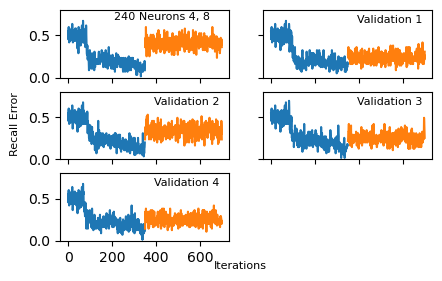

In [136]:
fig, axs = plt.subplots(3, 2, figsize=(4.8, 3))

# Assign each subplot
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]
ax5 = axs[2, 0]
ax6 = axs[2, 1]

fig.supxlabel('Iterations', fontsize=8)
fig.supylabel('Recall Error', fontsize=8)

# Plot the training recall errors for 240 neurons 4, 8
ax1.plot(recall_errors_240_4_8, label='Training Recall Error 45 Samples (Noise)', color='tab:blue')
ax1.plot(range(len(recall_errors_240_4_8), len(recall_errors_240_4_8) + len(recall_errors_val_240_4_8)), recall_errors_val_240_4_8, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
ax1.text(0.6, 0.9, '240 Neurons 4, 8', transform=ax1.transAxes, ha='center', va='center', fontsize=8)
ax1.set_xticklabels([])
ax1.set_ylim(0.0, 0.8)

# Plot the training recall errors for Validation 1
ax2.plot(recall_errors_4_8_list1, label='Training Recall Error 4 Samples', color='tab:blue')
ax2.plot(range(len(recall_errors_4_8_list1), len(recall_errors_4_8_list1) + len(recall_errors_4_8_list1_val)), recall_errors_4_8_list1_val, label='Validation Recall Error 4 Samples', color='tab:orange')
ax2.text(0.75, 0.85, 'Validation 1', transform=ax2.transAxes, ha='center', va='center', fontsize=8)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylim(0.0, 0.8)

# Plot the training recall errors for Validation 2
ax3.plot(recall_errors_4_8_list2, label='Training Recall Error 4 Samples', color='tab:blue')
ax3.plot(range(len(recall_errors_4_8_list2), len(recall_errors_4_8_list2) + len(recall_errors_4_8_list2_val)), recall_errors_4_8_list2_val, label='Validation Recall Error 4 Samples', color='tab:orange')
ax3.text(0.75, 0.85, 'Validation 2', transform=ax3.transAxes, ha='center', va='center', fontsize=8)
ax3.set_xticklabels([])
ax3.set_ylim(0.0, 0.8)

# Plot the training recall errors for Validation 3
ax4.plot(recall_errors_4_8_list3, label='Training Recall Error 4 Samples', color='tab:blue')
ax4.plot(range(len(recall_errors_4_8_list3), len(recall_errors_4_8_list3) + len(recall_errors_4_8_list3_val)), recall_errors_4_8_list3_val, label='Validation Recall Error 4 Samples', color='tab:orange')
ax4.text(0.75, 0.85, 'Validation 3', transform=ax4.transAxes, ha='center', va='center', fontsize=8)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_ylim(0.0, 0.8)

# Plot the training recall errors for Validation 4
ax5.plot(recall_errors_4_8_list4, label='Training Recall Error 4 Samples', color='tab:blue')
ax5.plot(range(len(recall_errors_4_8_list4), len(recall_errors_4_8_list4) + len(recall_errors_4_8_list4_val)), recall_errors_4_8_list4_val, label='Validation Recall Error 4 Samples', color='tab:orange')
ax5.text(0.75, 0.85, 'Validation 4', transform=ax5.transAxes, ha='center', va='center', fontsize=8)
ax5.set_ylim(0.0, 0.8)

ax6.set_visible(False)

In [120]:
# Calculate the mean and sem of the 50 last samples of the train recall errors
mean_train_4_8_list1 = round(np.mean(recall_errors_4_8_list1[-50:]), 3)
sem_train_4_8_list1 = round(stats.sem(recall_errors_4_8_list1[-50:]), 3)
mean_train_4_8_list2 = round(np.mean(recall_errors_4_8_list2[-50:]), 3)
sem_train_4_8_list2 = round(stats.sem(recall_errors_4_8_list2[-50:]), 3)
mean_train_4_8_list3 = round(np.mean(recall_errors_4_8_list3[-50:]), 3)
sem_train_4_8_list3 = round(stats.sem(recall_errors_4_8_list3[-50:]), 3)
mean_train_4_8_list4 = round(np.mean(recall_errors_4_8_list4[-50:]), 3)
sem_train_4_8_list4 = round(stats.sem(recall_errors_4_8_list4[-50:]), 3)

# Calculate the mean and sem of the val recall errors
mean_val_4_8_list1 = round(np.mean(recall_errors_4_8_list1_val), 3)
sem_val_4_8_list1 = round(stats.sem(recall_errors_4_8_list1_val), 3)
mean_val_4_8_list2 = round(np.mean(recall_errors_4_8_list2_val), 3)
sem_val_4_8_list2 = round(stats.sem(recall_errors_4_8_list2_val), 3)
mean_val_4_8_list3 = round(np.mean(recall_errors_4_8_list3_val), 3)
sem_val_4_8_list3 = round(stats.sem(recall_errors_4_8_list3_val), 3)
mean_val_4_8_list4 = round(np.mean(recall_errors_4_8_list4_val), 3)
sem_val_4_8_list4 = round(stats.sem(recall_errors_4_8_list4_val), 3)

In [121]:
#  Make a dataframe with the mean and std of the training and validation recall errors for 4_8
data_4_8_val = {
    'Model': ['240', 'Val 1', 'Val 2', 'Val 3', 'Val 4'],
    'Mean Train Recall Error': [mean_train_240_4_8, mean_train_4_8_list1, mean_train_4_8_list2, mean_train_4_8_list3, mean_train_4_8_list4],
    'Std Train Recall Error': [sem_train_240_4_8, sem_train_4_8_list1, sem_train_4_8_list2, sem_train_4_8_list3, sem_train_4_8_list4],
    'Mean Validation Recall Error': [mean_val_240_4_8, mean_val_4_8_list1, mean_val_4_8_list2, mean_val_4_8_list3, mean_val_4_8_list4],
    'Std Validation Recall Error': [sem_val_240_4_8, sem_val_4_8_list1, sem_val_4_8_list2, sem_val_4_8_list3, sem_val_4_8_list4]
}

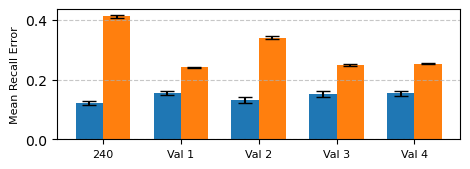

In [137]:
# Make a bar plot with the mean and std of the training and validation recall errors for 4_8
# Bar width and positions
bar_width = 0.35
x = np.arange(len(data_4_8_val['Model']))

# Create the bar chart
fig, ax = plt.subplots(figsize=(4.8, 1.8))
# Plot training bars
ax.bar(x - bar_width/2, data_4_8_val['Mean Train Recall Error'], width=bar_width,
       yerr=data_4_8_val['Std Train Recall Error'], capsize=5, label='Training')
# Plot validation bars
ax.bar(x + bar_width/2, data_4_8_val['Mean Validation Recall Error'], width=bar_width,
       yerr=data_4_8_val['Std Validation Recall Error'], capsize=5, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(data_4_8_val['Model'], fontsize=8)
ax.set_ylabel('Mean Recall Error', fontsize=8)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Membrane potential

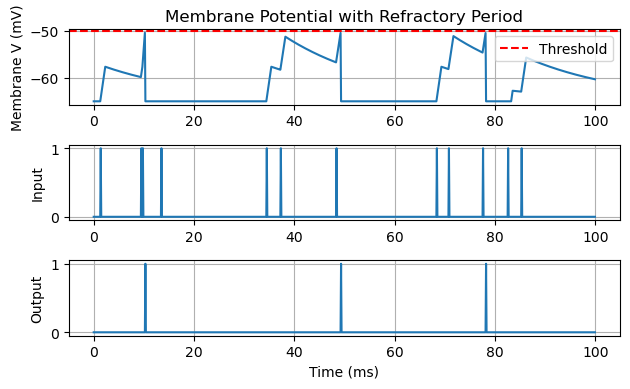

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility)
np.random.seed(12)

# Simulation parameters
T = 100  # total time (ms)
dt = 0.1  # time step (ms)
time = np.arange(0, T, dt)

# LIF neuron parameters
tau_m = 20       # membrane time constant (ms)
V_rest = -65     # resting potential (mV)
V_reset = -65    # reset potential (mV)
V_th = -50       # spike threshold (mV)
R = 100          # membrane resistance (MΩ)

# Refractory period
refractory_period = 5  # ms
refractory_steps = int(refractory_period / dt)
refractory_counter = 0

# Input spike train (Poisson)
spike_rate = 10 / 100  # spikes/ms (100 Hz)
input_spikes = np.random.rand(len(time)) < spike_rate * dt
input_current = np.zeros(len(time))

# Each input spike causes a 1 nA current pulse lasting 1 ms
pulse_amplitude = 1.5  # nA
pulse_duration = int(1 / dt)  # duration in steps

for t in np.where(input_spikes)[0]:
    input_current[t:t+pulse_duration] += pulse_amplitude

# Initialize membrane potential
V = np.zeros(len(time))
V[0] = V_rest
output_spikes = []

# Simulate
for t in range(1, len(time)):
    if refractory_counter > 0:
        V[t] = V_reset
        refractory_counter -= 1
    else:
        dV = (-(V[t-1] - V_rest) + R * input_current[t]) / tau_m
        V[t] = V[t-1] + dt * dV
        if V[t] >= V_th:
            V[t] = V_reset
            output_spikes.append(time[t])
            refractory_counter = refractory_steps  # enter refractory state

# Plot
plt.figure(figsize=(6.4, 4))

# Plot membrane potential
plt.subplot(3, 1, 1)
plt.plot(time, V)
plt.axhline(V_th, color='r', linestyle='--', label="Threshold")
plt.ylabel("Membrane V (mV)")
plt.title("Membrane Potential with Refractory Period")
plt.grid()
plt.legend(loc='upper right')

# Plot input spikes
plt.subplot(3, 1, 2)
plt.plot(time, input_spikes * 1.0, label="Input spikes")
plt.ylabel("Input")
plt.grid()

# Plot output spikes
output_spike_train = np.zeros(len(time))
for t in output_spikes:
    output_spike_train[int(t/dt)] = 1
plt.subplot(3, 1, 3)
plt.plot(time, output_spike_train, label="Output spikes")
plt.xlabel("Time (ms)")
plt.ylabel("Output")
plt.grid()

plt.tight_layout()
plt.show()


# validation of model with 5 samples

In [124]:
with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_5_2025-05-04_240_neruons_0_1_list_1\summary.txt", 'r') as file:
    train_5_240_lis1 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_5_2025-05-04_240_neruons_0_1_list_2\summary.txt", 'r') as file:
    train_5_240_lis2 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_5_2025-05-04_240_neruons_0_1_noise_list_1\summary.txt", 'r') as file:
    train_5_240_lis1_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_5_2025-05-04_240_neruons_0_1_noise_list_2\summary.txt", 'r') as file:
    train_5_240_lis2_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_val_2025-05-04_5_240_0_1_list_1\summary.txt", 'r') as file:
    val_5_240_lis1 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_val_2025-05-04_5_240_0_1_list_2\summary.txt", 'r') as file:
    val_5_240_lis2 = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_val_2025-05-04_5_240_0_1_list_1_noise\summary.txt", 'r') as file:
    val_5_240_lis1_noise = file.read()

with open(r"C:\Users\Bruker\Downloads\orion_scripts_train_5_val\results_val_2025-05-04_5_240_0_1_list_2_noise\summary.txt", 'r') as file:
    val_5_240_lis2_noise = file.read()

In [125]:
match_train_5_240_lis1 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_240_lis1)
match_train_5_240_lis2 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_240_lis2)
match_train_5_240_lis1_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_240_lis1_noise)
match_train_5_240_lis2_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', train_5_240_lis2_noise)

match_val_5_240_lis1 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_240_lis1)
match_val_5_240_lis2 = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_240_lis2)
match_val_5_240_lis1_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_240_lis1_noise)
match_val_5_240_lis2_noise = re.search(r'Recall Error Per Iteration:\n([\s\S]+?)\n\n', val_5_240_lis2_noise)

In [126]:
if match_train_5_240_lis1:
    recall_errors_5_240_lis1_text = match_train_5_240_lis1.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis1 = [float(num.strip()) for num in recall_errors_5_240_lis1_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis1)

if match_train_5_240_lis2:
    recall_errors_5_240_lis2_text = match_train_5_240_lis2.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis2 = [float(num.strip()) for num in recall_errors_5_240_lis2_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis2)

if match_train_5_240_lis1_noise:
    recall_errors_5_240_lis1_noise_text = match_train_5_240_lis1_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis1_noise = [float(num.strip()) for num in recall_errors_5_240_lis1_noise_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis1_noise)

if match_train_5_240_lis2_noise:
    recall_errors_5_240_lis2_noise_text = match_train_5_240_lis2_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis2_noise = [float(num.strip()) for num in recall_errors_5_240_lis2_noise_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis2_noise)

[0.6182, 0.4727, 0.4182, 0.5636, 0.3455, 0.5455, 0.4909, 0.6545, 0.3818, 0.4545, 0.5273, 0.5455, 0.4545, 0.4727, 0.4545, 0.4727, 0.5818, 0.4, 0.4909, 0.3818, 0.5273, 0.5636, 0.4727, 0.4727, 0.4727, 0.5636, 0.4364, 0.6, 0.5273, 0.4909, 0.4, 0.4909, 0.5091, 0.4909, 0.4364, 0.4545, 0.5091, 0.4182, 0.5455, 0.5636, 0.4364, 0.5273, 0.3818, 0.4727, 0.5091, 0.5818, 0.4545, 0.7091, 0.5818, 0.5273, 0.5273, 0.6182, 0.5818, 0.4727, 0.5091, 0.5091, 0.4364, 0.5455, 0.4182, 0.5091, 0.4182, 0.3818, 0.5636, 0.4364, 0.5455, 0.4364, 0.4182, 0.3636, 0.5091, 0.3818, 0.2182, 0.3091, 0.4182, 0.4182, 0.2727, 0.2727, 0.3091, 0.2727, 0.3636, 0.2909, 0.3273, 0.1818, 0.2182, 0.2, 0.2545, 0.1455, 0.3636, 0.3091, 0.2, 0.2182, 0.2364, 0.1636, 0.2364, 0.1818, 0.1273, 0.2364, 0.0545, 0.1273, 0.2, 0.1818, 0.1818, 0.1636, 0.1636, 0.1818, 0.2, 0.1818, 0.2, 0.2, 0.2909, 0.2, 0.1455, 0.0727, 0.1091, 0.3455, 0.1636, 0.1273, 0.2, 0.2, 0.1091, 0.2727, 0.1091, 0.0909, 0.1818, 0.1455, 0.2, 0.0545, 0.1273, 0.1455, 0.1818, 0.1818

In [127]:
if match_val_5_240_lis1:
    recall_errors_5_240_lis1_text = match_val_5_240_lis1.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis1_val = [float(num.strip()) for num in recall_errors_5_240_lis1_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis1_val)

if match_val_5_240_lis2:
    recall_errors_5_240_lis2_text = match_val_5_240_lis2.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis2_val = [float(num.strip()) for num in recall_errors_5_240_lis2_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis2_val)

if match_val_5_240_lis1_noise:
    recall_errors_5_240_lis1_noise_text = match_val_5_240_lis1_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis1_noise_val = [float(num.strip()) for num in recall_errors_5_240_lis1_noise_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis1_noise_val)

if match_val_5_240_lis2_noise:
    recall_errors_5_240_lis2_noise_text = match_val_5_240_lis2_noise.group(1)
    # Split the string into individual float numbers
    recall_errors_5_240_lis2_noise_val = [float(num.strip()) for num in recall_errors_5_240_lis2_noise_text.split(',') if num.strip()]
    print(recall_errors_5_240_lis2_noise_val)

[0.4545, 0.4727, 0.4, 0.3273, 0.4727, 0.4727, 0.4727, 0.4727, 0.4182, 0.4182, 0.4364, 0.4, 0.4545, 0.3818, 0.5455, 0.3818, 0.3636, 0.3455, 0.5636, 0.3636, 0.5273, 0.5455, 0.3455, 0.4, 0.5273, 0.4909, 0.4, 0.3636, 0.3636, 0.3455, 0.4182, 0.4545, 0.4364, 0.3273, 0.4, 0.2727, 0.4182, 0.4182, 0.2545, 0.4545, 0.3455, 0.4182, 0.4545, 0.4909, 0.4182, 0.3636, 0.5636, 0.4, 0.3818, 0.4182, 0.4, 0.4545, 0.5636, 0.5091, 0.3636, 0.4909, 0.3636, 0.3636, 0.4, 0.6182, 0.5636, 0.5636, 0.4364, 0.3636, 0.5091, 0.4727, 0.3455, 0.4545, 0.3273, 0.3091, 0.3273, 0.4545, 0.5091, 0.5091, 0.5273, 0.4909, 0.3818, 0.4727, 0.5455, 0.5273, 0.3818, 0.4364, 0.3636, 0.2182, 0.4727, 0.3818, 0.4182, 0.5273, 0.4182, 0.4727, 0.3818, 0.4182, 0.3818, 0.3636, 0.4182, 0.4182, 0.3091, 0.4364, 0.4364, 0.3818, 0.3273, 0.3636, 0.4545, 0.4909, 0.3455, 0.3273, 0.4182, 0.4364, 0.5273, 0.3636, 0.2727, 0.4364, 0.4727, 0.3818, 0.3818, 0.4364, 0.3455, 0.4727, 0.4909, 0.3818, 0.3091, 0.4909, 0.4182, 0.3636, 0.3818, 0.4, 0.3273, 0.4364, 0.

[Text(0, 0.0, ''), Text(0, 0.5, ''), Text(0, 1.0, '')]

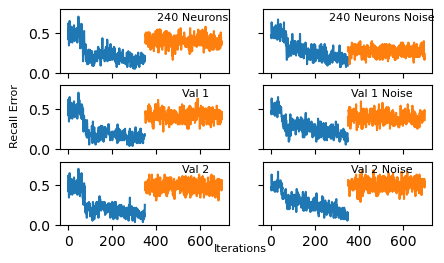

In [138]:
fig, axs = plt.subplots(3, 2, figsize=(4.8, 2.8))

fig.supxlabel('Iterations', fontsize=8)
fig.supylabel('Recall Error', fontsize=8)

for ax in axs.flat:
    ax.set_ylim(0.0, 0.8)

axs[0, 0].plot(recall_errors_5_240, label='Training Recall Error 5 Samples', color='tab:blue')
axs[0, 0].plot(range(len(recall_errors_5_240), len(recall_errors_5_240) + len(recall_errors_val_5_240)), recall_errors_val_5_240, label='Validation Recall Error 5 Samples', color='tab:orange')
axs[0, 0].text(0.78, 0.88, '240 Neurons', transform=axs[0, 0].transAxes, ha='center', va='center',fontsize=8)
axs[0, 0].set_xticklabels([])

# Plot the training recall errors with noise for 240 neurons
axs[0, 1].plot(recall_errors_5_240_noise, label='Training Recall Error 5 Samples (Noise)', color='tab:blue')
axs[0, 1].plot(range(len(recall_errors_5_240_noise), len(recall_errors_5_240_noise) + len(recall_errors_val_5_240_noise)), recall_errors_val_5_240_noise, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
axs[0, 1].text(0.7, 0.88, '240 Neurons Noise', transform=axs[0, 1].transAxes, ha='center', va='center', fontsize=8)
axs[0, 1].set_xticklabels([])
axs[0, 1].set_yticklabels([])

axs[1, 0].plot(recall_errors_5_240_lis1, label='Training Recall Error 5 Samples', color='tab:blue')
axs[1, 0].plot(range(len(recall_errors_5_240_lis1), len(recall_errors_5_240_lis1) + len(recall_errors_5_240_lis1_val)), recall_errors_5_240_lis1_val, label='Validation Recall Error 5 Samples', color='tab:orange')
axs[1, 0].text(0.8, 0.88, 'Val 1', transform=axs[1, 0].transAxes, ha='center', va='center', fontsize=8)
axs[1, 0].set_xticklabels([])

axs[1, 1].plot(recall_errors_5_240_lis1_noise, label='Training Recall Error 5 Samples (Noise)', color='tab:blue')
axs[1, 1].plot(range(len(recall_errors_5_240_lis1_noise), len(recall_errors_5_240_lis1_noise) + len(recall_errors_5_240_lis1_noise_val)), recall_errors_5_240_lis1_noise_val, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
axs[1, 1].text(0.7, 0.88, 'Val 1 Noise', transform=axs[1, 1].transAxes, ha='center', va='center', fontsize=8)
axs[1, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])

axs[2, 0].plot(recall_errors_5_240_lis2, label='Training Recall Error 5 Samples', color='tab:blue')
axs[2, 0].plot(range(len(recall_errors_5_240_lis2), len(recall_errors_5_240_lis2) + len(recall_errors_5_240_lis2_val)), recall_errors_5_240_lis2_val, label='Validation Recall Error 5 Samples', color='tab:orange')
axs[2, 0].text(0.8, 0.88, 'Val 2', transform=axs[2, 0].transAxes, ha='center', va='center', fontsize=8)

axs[2, 1].plot(recall_errors_5_240_lis2_noise, label='Training Recall Error 5 Samples (Noise)', color='tab:blue')
axs[2, 1].plot(range(len(recall_errors_5_240_lis2_noise), len(recall_errors_5_240_lis2_noise) + len(recall_errors_5_240_lis2_noise_val)), recall_errors_5_240_lis2_noise_val, label='Validation Recall Error 5 Samples (Noise)', color='tab:orange')
axs[2, 1].text(0.7, 0.88, 'Val 2 Noise', transform=axs[2, 1].transAxes, ha='center', va='center', fontsize=8)
axs[2, 1].set_yticklabels([])

In [129]:
# Calculate the mean and sem of the 50 last samples of the train recall errors
mean_train_5_240 = round(np.mean(recall_errors_5_240[-50:]), 3)
sem_train_5_240 = round(stats.sem(recall_errors_5_240[-50:]), 3)
mean_train_5_240_noise = round(np.mean(recall_errors_5_240_noise[-50:]), 3)
sem_train_5_240_noise = round(stats.sem(recall_errors_5_240_noise[-50:]), 3)
mean_train_5_240_lis1 = round(np.mean(recall_errors_5_240_lis1[-50:]), 3)
sem_train_5_240_lis1 = round(stats.sem(recall_errors_5_240_lis1[-50:]), 3)
mean_train_5_240_lis1_noise = round(np.mean(recall_errors_5_240_lis1_noise[-50:]), 3)
sem_train_5_240_lis1_noise = round(stats.sem(recall_errors_5_240_lis1_noise[-50:]), 3)
mean_train_5_240_lis2 = round(np.mean(recall_errors_5_240_lis2[-50:]), 3)
sem_train_5_240_lis2 = round(stats.sem(recall_errors_5_240_lis2[-50:]), 3)
mean_train_5_240_lis2_noise = round(np.mean(recall_errors_5_240_lis2_noise[-50:]), 3)
sem_train_5_240_lis2_noise = round(stats.sem(recall_errors_5_240_lis2_noise[-50:]), 3)

# Calculate the mean and sem of the val recall errors
mean_val_5_240 = round(np.mean(recall_errors_val_5_240), 3)
sem_val_5_240 = round(stats.sem(recall_errors_val_5_240), 3)
mean_val_5_240_noise = round(np.mean(recall_errors_val_5_240_noise), 3)
sem_val_5_240_noise = round(stats.sem(recall_errors_val_5_240_noise), 3)
mean_val_5_240_lis1 = round(np.mean(recall_errors_5_240_lis1_val), 3)
sem_val_5_240_lis1 = round(stats.sem(recall_errors_5_240_lis1_val), 3)
mean_val_5_240_lis1_noise = round(np.mean(recall_errors_5_240_lis1_noise_val), 3)
sem_val_5_240_lis1_noise = round(stats.sem(recall_errors_5_240_lis1_noise_val), 3)
mean_val_5_240_lis2 = round(np.mean(recall_errors_5_240_lis2_val), 3)
sem_val_5_240_lis2 = round(stats.sem(recall_errors_5_240_lis2_val), 3)
mean_val_5_240_lis2_noise = round(np.mean(recall_errors_5_240_lis2_noise_val), 3)
sem_val_5_240_lis2_noise = round(stats.sem(recall_errors_5_240_lis2_noise_val), 3)


In [130]:
# Make a dataframe with the mean and std of the training and validation recall errors for 5_240
data_5_240 = {
    'Model': ['240', '240 Noise', 'Val 1', 'Val 1 Noise', 'Val 2', 'Val 2 Noise'],
    'Mean Train Recall Error': [mean_train_5_240, mean_train_5_240_noise, mean_train_5_240_lis1, mean_train_5_240_lis1_noise, mean_train_5_240_lis2, mean_train_5_240_lis2_noise],
    'Std Train Recall Error': [sem_train_5_240, sem_train_5_240_noise, sem_train_5_240_lis1, sem_train_5_240_lis1_noise, sem_train_5_240_lis2, sem_train_5_240_lis2_noise],
    'Mean Validation Recall Error': [mean_val_5_240, mean_val_5_240_noise, mean_val_5_240_lis1, mean_val_5_240_lis1_noise, mean_val_5_240_lis2, mean_val_5_240_lis2_noise],
    'Std Validation Recall Error': [sem_val_5_240, sem_val_5_240_noise, sem_val_5_240_lis1, sem_val_5_240_lis1_noise, sem_val_5_240_lis2, sem_val_5_240_lis2_noise]
}


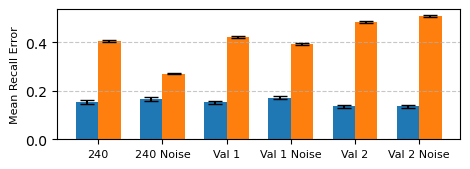

In [139]:
# make a bar plot
fig, ax = plt.subplots(figsize=(4.8, 1.8))
# Bar width and positions
bar_width = 0.35
x = np.arange(len(data_5_240['Model']))
# Create the bar chart
# Plot training bars
ax.bar(x - bar_width/2, data_5_240['Mean Train Recall Error'], width=bar_width,
       yerr=data_5_240['Std Train Recall Error'], capsize=5, label='Training')

# Plot validation bars
ax.bar(x + bar_width/2, data_5_240['Mean Validation Recall Error'], width=bar_width,
       yerr=data_5_240['Std Validation Recall Error'], capsize=5, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(data_5_240['Model'], fontsize=8)
ax.set_ylabel('Mean Recall Error', fontsize=8)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()